In [1]:
import pandas as pd 
import numpy as np
from datetime import datetime as dt
import csv

### 1. Data Preparation

In [2]:
df_1990_1999 = pd.read_csv('data/resale-flat-prices-based-on-approval-date-1990-1999.csv')
df_2000_2012 = pd.read_csv('data/resale-flat-prices-based-on-approval-date-2000-feb-2012.csv')
df_2012_2014 = pd.read_csv('data/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv')
df_2015_2016 = pd.read_csv('data/resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv')
df_2017_onwards = pd.read_csv('data/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')

In [3]:
df_1990_1999.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287200 entries, 0 to 287199
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                287200 non-null  object 
 1   town                 287200 non-null  object 
 2   flat_type            287200 non-null  object 
 3   block                287200 non-null  object 
 4   street_name          287200 non-null  object 
 5   storey_range         287200 non-null  object 
 6   floor_area_sqm       287200 non-null  float64
 7   flat_model           287200 non-null  object 
 8   lease_commence_date  287200 non-null  int64  
 9   resale_price         287200 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 21.9+ MB


In [4]:
# to remove remaining lease column to standardise table names across all tables
df_2015_2016 = df_2015_2016.drop('remaining_lease', axis=1)
df_2017_onwards = df_2017_onwards.drop('remaining_lease', axis=1)
df_2015_2016.head()
# df_2017_onwards.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,290000.0


In [5]:
# merge all the datasets together
merged_df = pd.concat([df_1990_1999, df_2000_2012, df_2012_2014, df_2015_2016, df_2017_onwards], axis=0, ignore_index=True)
merged_df.head()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0


### 2. Data Cleaning

Checking for null and empty values in each of the columns

In [6]:
# Check for null values in each column
print("Null Values in Each Column")
print(merged_df.isnull().sum())

# Check for empty strings in string columns
print("\n Empty Strings in String Columns ")
for col in merged_df.select_dtypes(include=['object']).columns:
    empty_count = (merged_df[col] == '').sum()
    if empty_count > 0:
        print(f"{col}: {empty_count} empty strings")

# Get percentage of null values
print("\n Percentage of Null Values")
null_percentage = (merged_df.isnull().sum() / len(merged_df)) * 100
print(null_percentage)

# Display rows with any null values
print("\n Sample Rows with Null Values")
print(merged_df[merged_df.isnull().any(axis=1)].head())

Null Values in Each Column
month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

 Empty Strings in String Columns 

 Percentage of Null Values
month                  0.0
town                   0.0
flat_type              0.0
block                  0.0
street_name            0.0
storey_range           0.0
floor_area_sqm         0.0
flat_model             0.0
lease_commence_date    0.0
resale_price           0.0
dtype: float64

 Sample Rows with Null Values
Empty DataFrame
Columns: [month, town, flat_type, block, street_name, storey_range, floor_area_sqm, flat_model, lease_commence_date, resale_price]
Index: []


In [7]:
# print unique towns, flat types, and street names
print(merged_df['town'].unique())
print(merged_df['flat_type'].unique())
print(merged_df['street_name'].unique())

['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT TIMAH'
 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG' 'HOUGANG'
 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'QUEENSTOWN' 'SENGKANG' 'SERANGOON' 'TAMPINES' 'TOA PAYOH' 'WOODLANDS'
 'YISHUN' 'LIM CHU KANG' 'SEMBAWANG' 'BUKIT PANJANG' 'PASIR RIS' 'PUNGGOL']
['1 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' '2 ROOM' 'EXECUTIVE'
 'MULTI GENERATION' 'MULTI-GENERATION']
['ANG MO KIO AVE 1' 'ANG MO KIO AVE 3' 'ANG MO KIO AVE 4'
 'ANG MO KIO AVE 10' 'ANG MO KIO AVE 5' 'ANG MO KIO AVE 8'
 'ANG MO KIO AVE 6' 'ANG MO KIO AVE 9' 'ANG MO KIO AVE 2'
 'BEDOK RESERVOIR RD' 'BEDOK NTH ST 3' 'BEDOK STH RD' 'NEW UPP CHANGI RD'
 'BEDOK NTH RD' 'BEDOK STH AVE 1' 'CHAI CHEE RD' 'CHAI CHEE DR'
 'BEDOK NTH AVE 4' 'BEDOK STH AVE 3' 'BEDOK STH AVE 2' 'BEDOK NTH ST 2'
 'BEDOK NTH ST 4' 'BEDOK NTH AVE 2' 'BEDOK NTH AVE 3' 'BEDOK NTH AVE 1'
 'BEDOK NTH ST 1' 'CHAI CHEE ST' 'SIN MING RD' 'SHUNFU RD'
 'BT BATOK ST 11' 'BT BATOK WEST AVE 8'

In [8]:
# print unique storey range and flat models
print(merged_df['storey_range'].unique())
print(merged_df['flat_model'].unique())

['10 TO 12' '04 TO 06' '07 TO 09' '01 TO 03' '13 TO 15' '19 TO 21'
 '16 TO 18' '25 TO 27' '22 TO 24' '28 TO 30' '31 TO 33' '40 TO 42'
 '37 TO 39' '34 TO 36' '06 TO 10' '01 TO 05' '11 TO 15' '16 TO 20'
 '21 TO 25' '26 TO 30' '36 TO 40' '31 TO 35' '46 TO 48' '43 TO 45'
 '49 TO 51']
['IMPROVED' 'NEW GENERATION' 'MODEL A' 'STANDARD' 'SIMPLIFIED'
 'MODEL A-MAISONETTE' 'APARTMENT' 'MAISONETTE' 'TERRACE' '2-ROOM'
 'IMPROVED-MAISONETTE' 'MULTI GENERATION' 'PREMIUM APARTMENT' 'Improved'
 'New Generation' 'Model A' 'Standard' 'Apartment' 'Simplified'
 'Model A-Maisonette' 'Maisonette' 'Multi Generation' 'Adjoined flat'
 'Premium Apartment' 'Terrace' 'Improved-Maisonette' 'Premium Maisonette'
 '2-room' 'Model A2' 'DBSS' 'Type S1' 'Type S2' 'Premium Apartment Loft']


In [9]:
# replace and standardise flat models
replace_values = {'NEW GENERATION':'New Generation', 'SIMPLIFIED':'Simplified', 'STANDARD':'Standard', 'MODEL A-MAISONETTE':'Maisonette', 'MULTI GENERATION':'Multi Generation', 'IMPROVED-MAISONETTE':'Executive Maisonette', 'Improved-Maisonette':'Executive Maisonette', 'Premium Maisonette':'Executive Maisonette', '2-ROOM':'2-room', 'MODEL A':'Model A', 'MAISONETTE':'Maisonette', 'Model A-Maisonette':'Maisonette', 'IMPROVED':'Improved', 'TERRACE':'Terrace', 'PREMIUM APARTMENT':'Premium Apartment', 'Premium Apartment Loft':'Premium Apartment', 'APARTMENT':'Apartment', 'Type S1':'Type S1S2', 'Type S2':'Type S1S2'}
merged_df = merged_df.replace({'flat_model': replace_values})

merged_df['flat_model'].value_counts()

Model A                 228389
Improved                217356
New Generation          177570
Simplified               53960
Standard                 39854
Premium Apartment        35066
Apartment                32004
Maisonette               28798
Model A2                  9109
DBSS                      1609
Adjoined flat             1085
Terrace                    642
Multi Generation           502
Type S1S2                  401
Executive Maisonette       196
2-room                      40
Name: flat_model, dtype: int64

In [10]:
# standardise flat types for multi generation units
merged_df['flat_type'] = merged_df['flat_type'].replace('MULTI-GENERATION', 'MULTI GENERATION')
print(merged_df['flat_type'].unique())

['1 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' '2 ROOM' 'EXECUTIVE'
 'MULTI GENERATION']


In [11]:
# format date time columns
merged_df['month'] = pd.to_datetime(merged_df['month'], format='%Y-%m')
merged_df['lease_commence_date'] = pd.to_datetime(merged_df['lease_commence_date'], format='%Y')
merged_df.dtypes

month                  datetime64[ns]
town                           object
flat_type                      object
block                          object
street_name                    object
storey_range                   object
floor_area_sqm                float64
flat_model                     object
lease_commence_date    datetime64[ns]
resale_price                  float64
dtype: object

In [12]:
# calculate flat age at time of resale
merged_df['flat_age'] = (merged_df['month'].dt.year - merged_df['lease_commence_date'].dt.year)
merged_df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,flat_age
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977-01-01,9000.0,13
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977-01-01,6000.0,13
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977-01-01,8000.0,13
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1977-01-01,6000.0,13
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976-01-01,47200.0,14


### 3. Read in externally extracted data

3.1. Read in CPI data to adjust for inflation

In [13]:
# CPI extracted from https://www.singstat.gov.sg/publications/reference/ebook/economy/prices-and-price-indices
cpi = pd.read_csv('data/cpi.csv')
cpi.head()

,year,cpi
0,2024,100.000
1,2023,97.666
2,2022,93.163
3,2021,87.781
4,2020,85.794


In [14]:
# create a year column so that it can be left joined with CPI data
merged_df['year'] = merged_df['month'].dt.year
merged_df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,flat_age,year
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977-01-01,9000.0,13,1990
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977-01-01,6000.0,13,1990
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977-01-01,8000.0,13,1990
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1977-01-01,6000.0,13,1990
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976-01-01,47200.0,14,1990


In [15]:
# merge CPI data on year
merged_df = merged_df.merge(cpi, on='year', how='left')

In [16]:
# to get inflation adjusted price of flats
merged_df['real_price'] = (merged_df['resale_price'] / merged_df['cpi']) * 100 
merged_df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,flat_age,year,cpi,real_price
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977-01-01,9000.0,13,1990,53.898,16698.207726
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977-01-01,6000.0,13,1990,53.898,11132.138484
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977-01-01,8000.0,13,1990,53.898,14842.851312
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1977-01-01,6000.0,13,1990,53.898,11132.138484
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976-01-01,47200.0,14,1990,53.898,87572.822739


In [17]:
# write the merged data into a csv, just in case :) 
merged_df.to_csv('data/merged_df.csv', index=False)

Read in externally extracted data, such as locations of primary schools and MRT stations
Please refer to get_coordinates.ipynb for steps on how to extract these datapoints

In [18]:
location_details = pd.read_csv('data/location_details.csv')
location_details.head()

,block,street_name,Address,Postal,Latitude,Longitude,mrt_count_500m,schools_within_2km,top25_schools_within_2km,nearby_top25_schools,distance_to_cbd
0,309,ANG MO KIO AVE 1,207 ANG MO KIO AVENUE 1 ANG MO KIO 22 SINGAPOR...,560207,1.365821,103.842848,0,10,4,"Ai Tong School, Catholic High School (Primary)...",9134.378661
1,216,ANG MO KIO AVE 1,216 ANG MO KIO AVENUE 1 ANG MO KIO 22 SINGAPOR...,560216,1.366197,103.841505,0,10,3,"Ai Tong School, Catholic High School (Primary)...",9192.714790
2,211,ANG MO KIO AVE 3,211 ANG MO KIO AVENUE 3 SINGAPORE 560211,560211,1.369197,103.841667,0,11,4,"Ai Tong School, Catholic High School (Primary)...",9521.908686
3,202,ANG MO KIO AVE 3,202 ANG MO KIO AVENUE 3 ANG MO KIO VIEW SINGAP...,560202,1.368446,103.844516,0,11,4,"Ai Tong School, Catholic High School (Primary)...",9407.743380
4,235,ANG MO KIO AVE 3,235 ANG MO KIO AVENUE 3 KEBUN BARU PALM VIEW S...,560235,1.366824,103.836491,0,8,3,"Ai Tong School, Catholic High School (Primary)...",9344.886133


In [19]:
# Perform left join between merged_df and location_details
merged_df = merged_df.merge(
    location_details[['block', 'street_name', 'mrt_count_500m', 'schools_within_2km', 'top25_schools_within_2km', 'distance_to_cbd']],
    on=['block', 'street_name'],
    how='left'
)
merged_df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,flat_age,year,cpi,real_price,mrt_count_500m,schools_within_2km,top25_schools_within_2km,distance_to_cbd
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977-01-01,9000.0,13,1990,53.898,16698.207726,0,10,4,9134.378661
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977-01-01,6000.0,13,1990,53.898,11132.138484,0,10,4,9134.378661
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977-01-01,8000.0,13,1990,53.898,14842.851312,0,10,4,9134.378661
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1977-01-01,6000.0,13,1990,53.898,11132.138484,0,10,4,9134.378661
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976-01-01,47200.0,14,1990,53.898,87572.822739,0,10,3,9192.714790


In [20]:
# Create a new column which re-categorises storeys into Low, Mid and High Floor
# - 1st - 6th floor = Low Floor
# - 7th - 12th floor = Mid Floor 
# - 13th - 35th floor = High Floor

def categorize_storey(storey_range):
    # Split the range and get first number
    range_parts = storey_range.split('TO')
    start_floor = int(range_parts[0].strip()[:2])  # Get first 2 digits
    
    if start_floor <= 6:
        return "Low Floor"
    elif start_floor <= 12:
        return "Mid Floor" 
    else:
        return "High Floor"

# Create new column with floor categories
merged_df['floor_category'] = merged_df['storey_range'].apply(categorize_storey)

In [21]:
# create new column region to categorise towns
region_map = {'ANG MO KIO':'Central', 'BEDOK':'East', 'BISHAN':'Central', 'BUKIT BATOK':'West', 'BUKIT MERAH':'Central',
       'BUKIT PANJANG':'West', 'BUKIT TIMAH':'Central', 'CENTRAL AREA':'Central', 'CHOA CHU KANG':'West',
       'CLEMENTI':'West', 'GEYLANG':'Central', 'HOUGANG':'North East', 'JURONG EAST':'West', 'JURONG WEST':'West',
       'KALLANG/WHAMPOA':'Central', 'MARINE PARADE':'Central', 'PASIR RIS':'East', 'PUNGGOL':'North East',
       'QUEENSTOWN':'Central', 'SEMBAWANG':'North', 'SENGKANG':'North East', 'SERANGOON':'North East', 'TAMPINES':'East',
       'TOA PAYOH':'Central', 'WOODLANDS':'North', 'YISHUN':'North'}

merged_df['region'] = merged_df['town'].map(region_map)


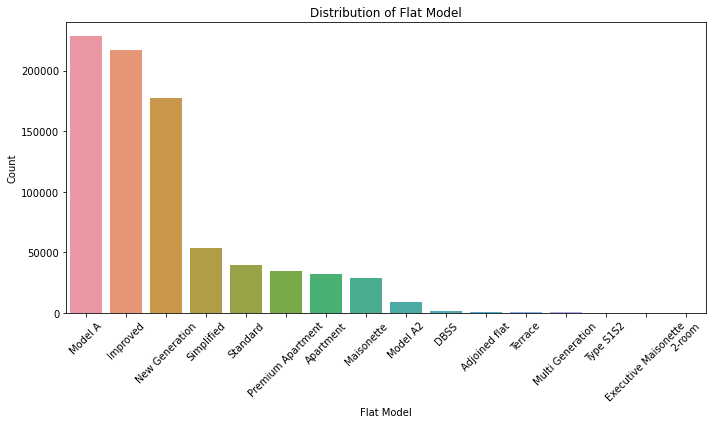

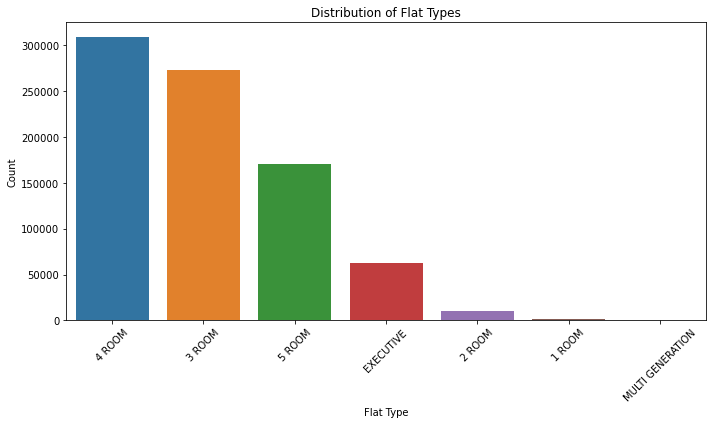

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot distribution of flat models
plt.figure(figsize=(10,6))
sns.countplot(data=merged_df, x='flat_model', order=merged_df['flat_model'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Flat Model')
plt.xlabel('Flat Model')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Pplot distribution of flat types
plt.figure(figsize=(10,6))
sns.countplot(data=merged_df, x='flat_type', order=merged_df['flat_type'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Flat Types')
plt.xlabel('Flat Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [23]:
# remove flat types with very few cases
merged_df = merged_df[~merged_df['flat_type'].isin(['MULTI GENERATION', '1 ROOM'])]

# re-categorize flat models
replace_values = {'Executive Maisonette':'Maisonette', 'Terrace':'Special', 'Adjoined flat':'Special', 
                    'Type S1S2':'Special', 'DBSS':'Special', 'Model A2':'Model A', 'Premium Apartment':'Apartment', 'Improved':'Standard', 'Simplified':'Model A', '2-room':'Standard'}
merged_df = merged_df.replace({'flat_model': replace_values})

# label encode flat type
replace_values = {'2 ROOM':0, '3 ROOM':1, '4 ROOM':2, '5 ROOM':3, 'EXECUTIVE':4}
merged_df = merged_df.replace({'flat_type': replace_values})


In [24]:
# change lease commence date to year format
merged_df['lease_commence_date'] = pd.to_datetime(merged_df['lease_commence_date']).dt.year
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824806 entries, 4 to 826580
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   month                     824806 non-null  datetime64[ns]
 1   town                      824806 non-null  object        
 2   flat_type                 824806 non-null  int64         
 3   block                     824806 non-null  object        
 4   street_name               824806 non-null  object        
 5   storey_range              824806 non-null  object        
 6   floor_area_sqm            824806 non-null  float64       
 7   flat_model                824806 non-null  object        
 8   lease_commence_date       824806 non-null  int64         
 9   resale_price              824806 non-null  float64       
 10  flat_age                  824806 non-null  int64         
 11  year                      824806 non-null  int64         
 12  cp

In [25]:
merged_df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,flat_age,year,cpi,real_price,mrt_count_500m,schools_within_2km,top25_schools_within_2km,distance_to_cbd,floor_category,region
4,1990-01-01,ANG MO KIO,1,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,47200.0,14,1990,53.898,87572.822739,0,10,3,9192.714790,Low Floor,Central
5,1990-01-01,ANG MO KIO,1,211,ANG MO KIO AVE 3,01 TO 03,67.0,New Generation,1977,46000.0,13,1990,53.898,85346.395042,0,11,4,9521.908686,Low Floor,Central
6,1990-01-01,ANG MO KIO,1,202,ANG MO KIO AVE 3,07 TO 09,67.0,New Generation,1977,42000.0,13,1990,53.898,77924.969387,0,11,4,9407.743380,Mid Floor,Central
7,1990-01-01,ANG MO KIO,1,235,ANG MO KIO AVE 3,10 TO 12,67.0,New Generation,1977,38000.0,13,1990,53.898,70503.543731,0,8,3,9344.886133,Mid Floor,Central
8,1990-01-01,ANG MO KIO,1,235,ANG MO KIO AVE 3,04 TO 06,67.0,New Generation,1977,40000.0,13,1990,53.898,74214.256559,0,8,3,9344.886133,Low Floor,Central


### 4. Drop columns not needed for modelling

In [26]:
# Drop columns that are not needed for modeling
columns_to_drop = ['month', 'year', 'cpi', 'resale_price', 'block', 'street_name']
merged_df = merged_df.drop(columns=columns_to_drop)

### 5. Remove features which are correlated to each other (i.e. check for multicollinearity)

C:\Users\nujen\AppData\Local\Temp/ipykernel_15664/2814099731.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


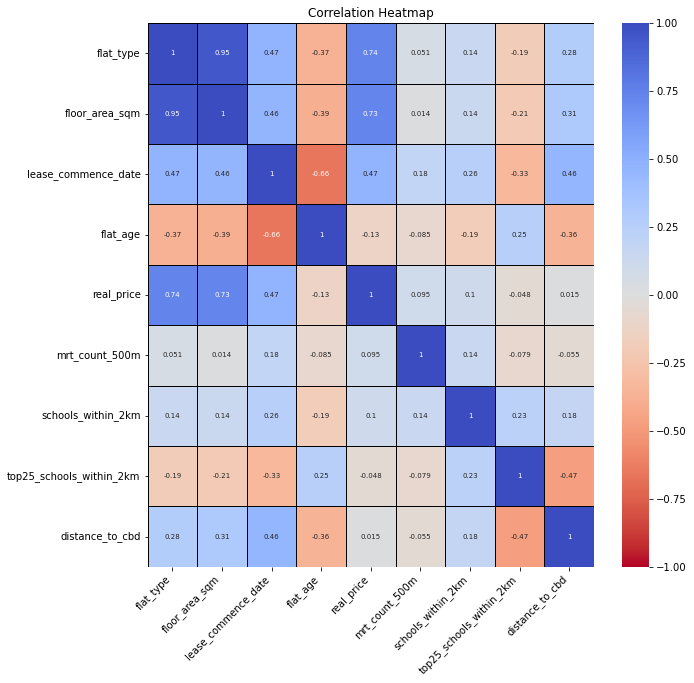

In [27]:
# Correlation heatmap
fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(merged_df.select_dtypes(include=['int64','float64']).corr(), annot = True, fmt='.2g', 
    vmin=-1, vmax=1, center= 0, cmap= 'coolwarm_r', linecolor='black', linewidth=1, annot_kws={"size": 7})
#ax.set_ylim(0 ,5)
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Heatmap')
fig.show()

In [28]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['tolerance'] = 1/vif.VIF
    vif['meanVIF'] = vif.VIF.mean()

    return(vif)

calc_vif(merged_df.drop(['real_price'],axis=1).select_dtypes(include=['int64','float64']))

,variables,VIF,tolerance,meanVIF
0,flat_type,60.754243,0.016460,40.77672
1,floor_area_sqm,165.402459,0.006046,40.77672
2,lease_commence_date,65.073302,0.015367,40.77672
3,flat_age,5.239717,0.190850,40.77672
4,mrt_count_500m,1.575717,0.634632,40.77672
5,schools_within_2km,11.810682,0.084669,40.77672
6,top25_schools_within_2km,2.780031,0.359708,40.77672
7,distance_to_cbd,13.577609,0.073651,40.77672


As the VIF scores for flat_type, lease_commence_date anmd schools within 2km are very large, we will remove them. 
Lease commence date is also exactly correlated to flat age. 
Flat type is also correlated to floor area sqm.

We will choose to keep floor area sqm and distance to CBD as we think these features are important.


In [29]:
calc_vif(merged_df.drop(['real_price', 'schools_within_2km', 'lease_commence_date', 'flat_type'],axis=1).select_dtypes(include=['int64','float64']))

,variables,VIF,tolerance,meanVIF
0,floor_area_sqm,10.237878,0.097676,5.063124
1,flat_age,3.221836,0.310382,5.063124
2,mrt_count_500m,1.417194,0.705620,5.063124
3,top25_schools_within_2km,1.970832,0.507400,5.063124
4,distance_to_cbd,8.467881,0.118093,5.063124


Most of the variables now have <10 VIF scores. We will keep floor area sqm even though VIF score is high as we believe that this variable is important in predicting flat prices

### 6. Data Transformation

- Remove outlier values which fall outside 1.5*IQR values 
- Try different log transformation for real_prices values to adjust the skewness of price data. This is needed for linear regression modelling

The final dataframe to be used for modelling is stored in cleaned_df.

C:\Users\nujen\AppData\Local\Temp/ipykernel_15664/1512560701.py:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_iqr = ((merged_df < (Q1 - 1.5 * IQR)) | (merged_df > (Q3 + 1.5 * IQR))).any(axis=1)
C:\Users\nujen\AppData\Local\Temp/ipykernel_15664/1512560701.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['real_price_log'] = np.log(cleaned_df['real_price'])
C:\Users\nujen\AppData\Local\Temp/ipykernel_15664/1512560701.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

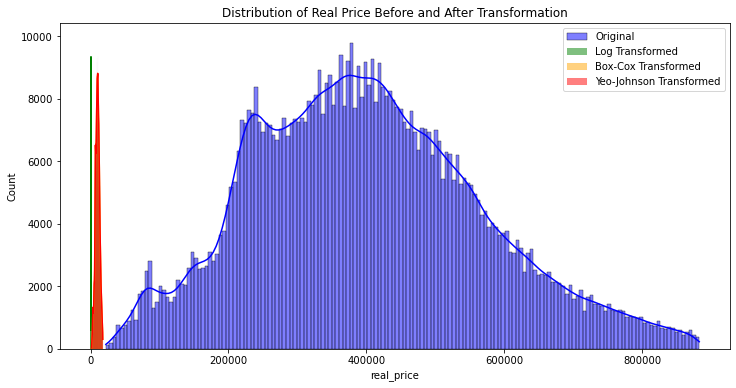

In [30]:
from scipy.stats import zscore, boxcox, yeojohnson
import numpy as np
import seaborn as sns

# Check for outliers using Z-Score
z_scores = np.abs(zscore(merged_df.select_dtypes(include=['float64', 'int64'])))
outliers = np.where(z_scores > 3)

# Check for outliers using IQR method, we will remove outliers which fall outside 1.5*IQR
Q1 = merged_df.quantile(0.25)
Q3 = merged_df.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((merged_df < (Q1 - 1.5 * IQR)) | (merged_df > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove outliers and create a new dataframe
cleaned_df = merged_df[~outliers_iqr]

# Apply log transformation to skewed columns
cleaned_df['real_price_log'] = np.log(cleaned_df['real_price'])

# Apply Box-Cox transformation (only for positive values)
cleaned_df['real_price_boxcox'], _ = boxcox(cleaned_df['real_price'] + 1)

# Apply Yeo-Johnson transformation (handles zero and negative values)
cleaned_df['real_price_yeojohnson'], _ = yeojohnson(cleaned_df['real_price'])

# Visualize the distribution after transformation
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.histplot(cleaned_df['real_price'], kde=True, label='Original', color='blue')
sns.histplot(cleaned_df['real_price_log'], kde=True, label='Log Transformed', color='green')
sns.histplot(cleaned_df['real_price_boxcox'], kde=True, label='Box-Cox Transformed', color='orange')
sns.histplot(cleaned_df['real_price_yeojohnson'], kde=True, label='Yeo-Johnson Transformed', color='red')
plt.legend()
plt.title('Distribution of Real Price Before and After Transformation')
plt.show()

Testing out the shapes of the different log transformations. We will proceed with Yeo Johnson transformation as the resulting real price values have a relatively normal distribution pattern

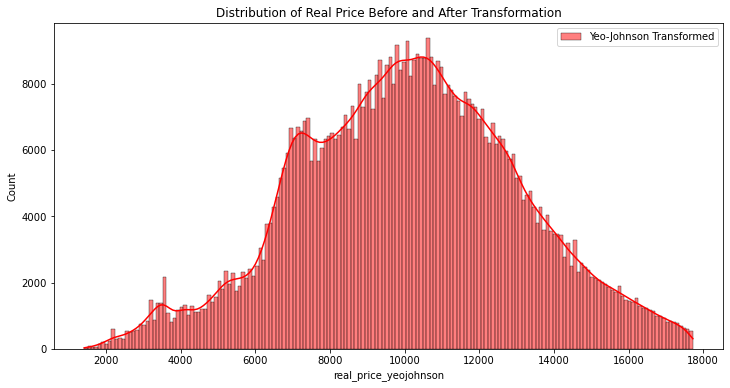

In [31]:
plt.figure(figsize=(12, 6))
# sns.histplot(cleaned_df['real_price'], kde=True, label='Original', color='blue')
# sns.histplot(cleaned_df['real_price_log'], kde=True, label='Log Transformed', color='green')
# sns.histplot(cleaned_df['real_price_boxcox'], kde=True, label='Box-Cox Transformed', color='orange')
sns.histplot(cleaned_df['real_price_yeojohnson'], kde=True, label='Yeo-Johnson Transformed', color='red')
plt.legend()
plt.title('Distribution of Real Price Before and After Transformation')
plt.show()

In [32]:
cleaned_df.head()

,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,flat_age,real_price,mrt_count_500m,schools_within_2km,top25_schools_within_2km,distance_to_cbd,floor_category,region,real_price_log,real_price_boxcox,real_price_yeojohnson
17,ANG MO KIO,1,07 TO 09,67.0,New Generation,1977,13,74214.256559,0,7,2,10576.480265,Mid Floor,Central,11.214712,3231.771182,3231.771182
23,ANG MO KIO,1,04 TO 06,74.0,New Generation,1978,12,68648.187317,0,7,2,10116.670331,Low Floor,Central,11.136750,3063.127203,3063.127203
48,ANG MO KIO,1,01 TO 03,83.0,New Generation,1979,11,89057.107870,0,9,2,9390.822948,Low Floor,Central,11.397033,3663.287590,3663.287590
49,ANG MO KIO,1,01 TO 03,67.0,New Generation,1979,11,87572.822739,0,9,2,9298.509739,Low Floor,Central,11.380226,3621.208399,3621.208399
50,ANG MO KIO,1,01 TO 03,67.0,New Generation,1979,11,68648.187317,0,9,2,9298.509739,Low Floor,Central,11.136750,3063.127203,3063.127203


Plot the distribution charts for each of the numerical features

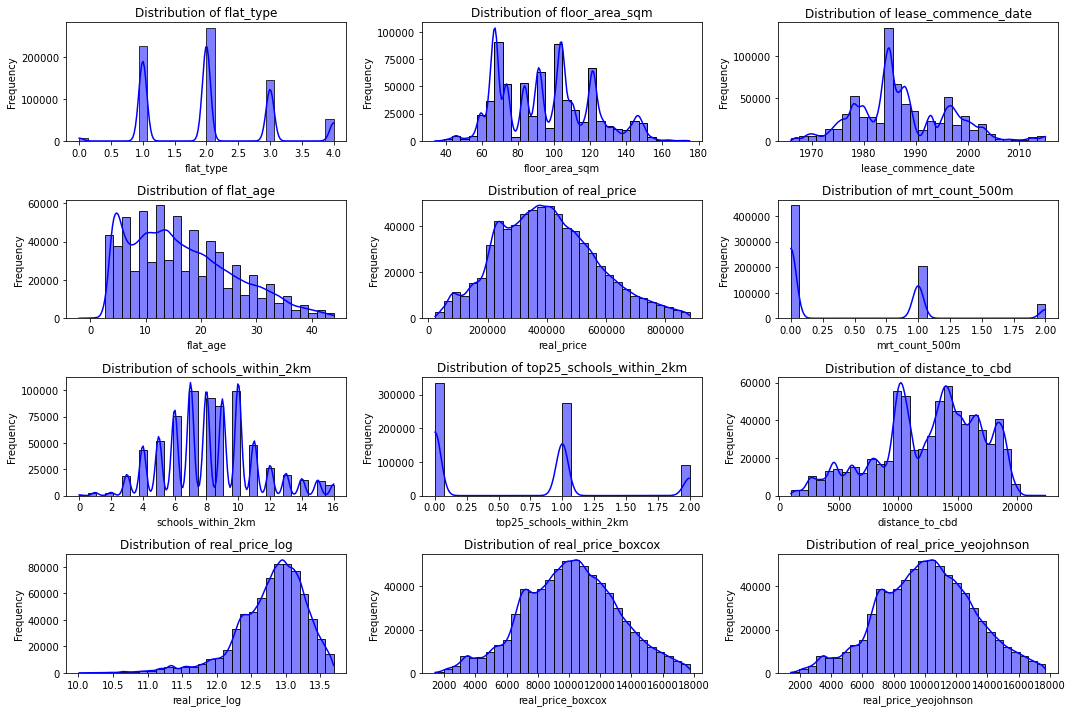

In [33]:
import seaborn as sns

import matplotlib.pyplot as plt

# Select numerical columns from cleaned_df
numerical_columns = cleaned_df.select_dtypes(include=['float64', 'int64']).columns

# Plot distribution curves for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot((len(numerical_columns) + 2) // 3, 3, i)
    sns.histplot(cleaned_df[col], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()

### 7. Model Training and Evaluation

### 7.1. Linear Regression Model

c:\Users\nujen\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                              OLS Regression Results                             
Dep. Variable:     real_price_yeojohnson   R-squared:                       0.635
Model:                               OLS   Adj. R-squared:                  0.635
Method:                    Least Squares   F-statistic:                 7.640e+04
Date:                   Mon, 05 May 2025   Prob (F-statistic):               0.00
Time:                           14:48:18   Log-Likelihood:            -6.2622e+06
No. Observations:                 702386   AIC:                         1.252e+07
Df Residuals:                     702369   BIC:                         1.252e+07
Df Model:                             16                                         
Covariance Type:               nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

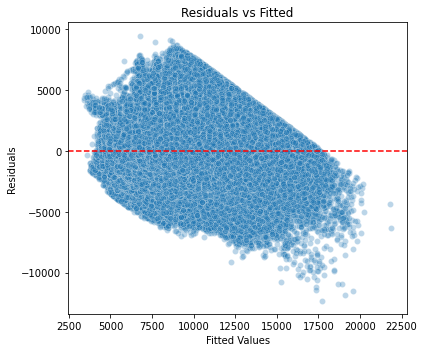

c:\Users\nujen\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 432x360 with 0 Axes>

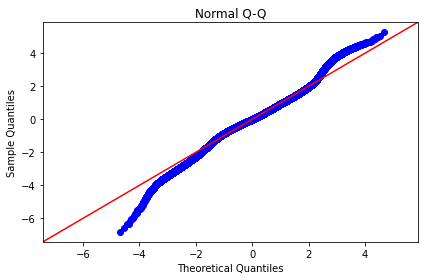

In [34]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select features and target
target_col = 'real_price_yeojohnson'
numerical_cols = ['flat_age','mrt_count_500m', 'top25_schools_within_2km', 'distance_to_cbd', 'floor_area_sqm']
categorical_cols = ['region', 'floor_category', 'flat_model'] # 'storey_range',

df = cleaned_df[numerical_cols + categorical_cols + [target_col]].dropna()

# Step 2: One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Step 3: Standardize numerical features
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Step 4: Split into features and target
X = df_encoded.drop(columns=target_col)
y = df_encoded[target_col]
X_const = sm.add_constant(X)

# Step 5: Fit linear regression
model = sm.OLS(y, X_const).fit()
print(model.summary())

# Step 6: Diagnostic plots
residuals = model.resid
fitted = model.fittedvalues

# Plot Residuals vs Fitted
plt.figure(figsize=(6, 5))
sns.scatterplot(x=fitted, y=residuals, alpha=0.3)
plt.axhline(0, linestyle='--', color='red')
plt.title("Residuals vs Fitted")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

# Plot Q-Q in a separate figure
plt.figure(figsize=(6, 5))
sm.qqplot(residuals, line='45', fit=True)
plt.title("Normal Q-Q")
plt.tight_layout()
plt.show()

From the residual vs fitted and QQ plots both suggest that there is heteroscedasticity - which means that there is a non-uniform variance in residuals (i.e. actual value - predicted value). The heavy tail at the Q-Q plot suggests that there could be outliers which might be affecting the model performance.

Linear regression assumes a linear relationship between the input variables and predicted values. However, variables affecting flat prices might not have a linear relationship to price. This may explain the relatively low R-squared value of 0.635, indicating that the model explains only 63.5% of the variance in flat prices. Hence, we will explore two tree-based models in the following sections, which are better suited for capturing complex, non-linear relationships.

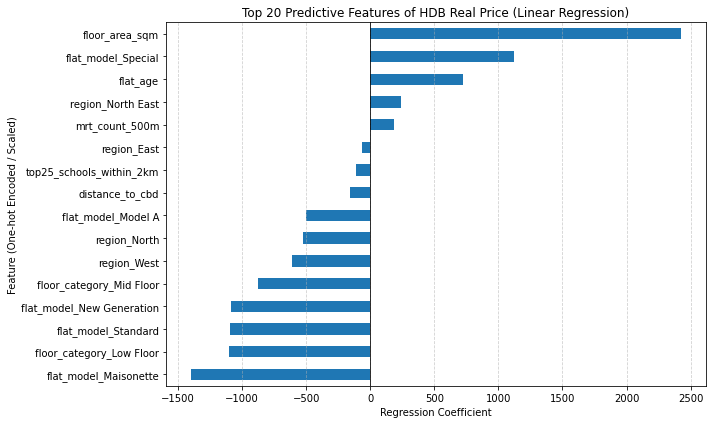

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Extract coefficients and feature names
coef_series = pd.Series(model.params, index=X_const.columns)

# Drop the intercept (constant term)
coef_series = coef_series.drop('const')

# Take absolute values for ranking, but retain signed values for direction
top_n = 20  # Number of top features to plot
top_features = coef_series.abs().sort_values(ascending=False).head(top_n).index
top_coef = coef_series.loc[top_features]

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
top_coef.sort_values().plot(kind='barh')

# Annotate axes
plt.title(f"Top {top_n} Predictive Features of HDB Real Price (Linear Regression)")
plt.xlabel("Regression Coefficient")
plt.ylabel("Feature (One-hot Encoded / Scaled)")
plt.axvline(0, color='black', linewidth=0.8)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 7.2. XGBoost model

Root Mean Squared Error: 1260.4126504266787
R-squared: 0.8211653308287374
Cross-validated R-squared scores for 5-fold: [0.19789881 0.85516683 0.68354482 0.68047914 0.26726056]
Mean Cross-validated R-squared score: 0.5368700348415756


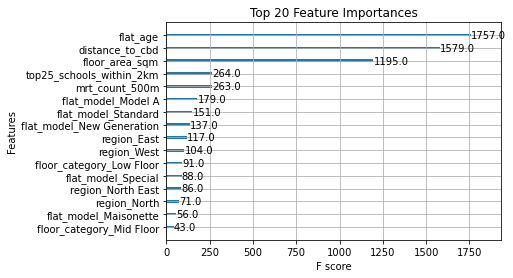

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import xgboost as xgb

# Step 1: Select features and target
target_col = 'real_price_yeojohnson'  
numerical_cols = ['flat_age', 'mrt_count_500m', 'top25_schools_within_2km', 'distance_to_cbd', 'floor_area_sqm']
categorical_cols = ['region', 'floor_category', 'flat_model']

# Prepare the dataset
df = cleaned_df[numerical_cols + categorical_cols + [target_col]].dropna()

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Split into features and target
X = df_encoded.drop(columns=target_col)
y = df_encoded[target_col]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train XGBoost model
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = xgb_model.predict(X_test)

# Step 4: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {np.sqrt(mse)}")
print(f"R-squared: {r2}")

# Step 5: K-Cross Fold Validation
k = 5  
cv_r2scores = cross_val_score(xgb_model, X, y, cv=k, scoring='r2')

print(f"Cross-validated R-squared scores for {k}-fold: {cv_r2scores}")
print(f"Mean Cross-validated R-squared score: {np.mean(cv_r2scores)}")

# Feature importance
import matplotlib.pyplot as plt
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=20)
plt.title("Top 20 Feature Importances")
plt.show()

Root mean squared error of $1260 means that the average variance in prediction value is ~$1260. 

While the initial R-squared value is relatively high at 0.821, there could be overfitting issues as the k-cross fold validation showed that certain folds have very poor R-squared values (0.20, 0.27). There might be issues of data imbalance, noise, or that different regions / features might behave differently, hence making model generalisation harder.

The average R-squared score for the k-cross fold validation is 0.537, which means that the model explains only ~54% of variance consistently across different subsets.


### 7.3. Using Random Forest Model

Root Mean Squared Error: 676.1566265927926
R-squared: 0.9485339513644542
Cross-validated R-squared scores for 5-fold: [0.13239354 0.81976172 0.7327126  0.67921363 0.17373476]
Mean Cross-validated R-squared score: 0.5075632503611678


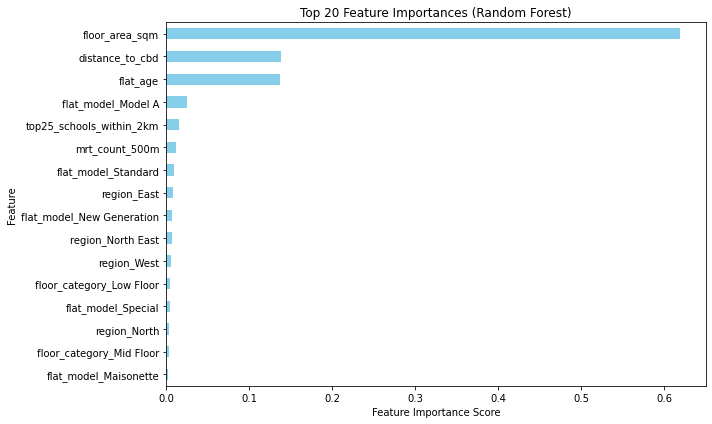

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Select features and target
target_col = 'real_price_yeojohnson'
numerical_cols = ['flat_age','mrt_count_500m', 'top25_schools_within_2km', 'distance_to_cbd', 'floor_area_sqm']
categorical_cols = ['region', 'floor_category', 'flat_model']

# Prepare the dataset
df = cleaned_df[numerical_cols + categorical_cols + [target_col]].dropna()

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Split into features and target
X = df_encoded.drop(columns=target_col)
y = df_encoded[target_col]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {np.sqrt(mse)}")
print(f"R-squared: {r2}")

# K-Cross Fold Validation
k = 5  
cv_r2scores = cross_val_score(rf_model, X, y, cv=k, scoring='r2')

print(f"Cross-validated R-squared scores for {k}-fold: {cv_r2scores}")
print(f"Mean Cross-validated R-squared score: {np.mean(cv_r2scores)}")

# Plot feature importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
top_features.plot(kind='barh', color='skyblue')
plt.title("Top 20 Feature Importances (Random Forest)")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()

Root mean squared error for Random Forest is $676, which means that the average variance in prediction value is ~$676.

Similar to what we saw with XGBoost, R-square value is high at ~0.949. There is likely overfitting here as well as we see that the R-square values for some folds in the k-cross fold validation having poor scores (0.13, 0.17). 

The average R-squared score for the k-cross fold validation is 0.507, which means that the model explains only ~51% of variance consistently across different subsets.

### 8. Future Work
- Explore additional external datapoints (e.g. distance to parks, healthcare institutions, parks, etc)
- Explore effect of macro-economic trends and policy changes
- Explore different categorical encodings (e.g. different frequency encodings for flat types, flat storey levels)
- Other possible modeling techniques which can better handle mixed data types / features